# Import Libraries

In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Telco_Customer_ValueandRisk_Segmented_Final1.csv')

In [7]:
df.head(5)

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,...,Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Customer Value,Num Product Used,Internet Access,Churn Probability,Churn Predicted,Customer Risk
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,...,Yes,106.816666,-6.2,4210.7,Low-Value,2,Yes,0.424499,0,High-Risk
1,1,2,Jakarta,High End,No,No,No,No,No,No,...,Yes,106.816666,-6.2,3511.3,Low-Value,0,Yes,0.879698,1,High-Risk
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,...,Yes,106.816666,-6.2,6983.6,High-Value,2,Yes,0.902525,1,High-Risk
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,...,Yes,106.816666,-6.2,6503.9,High-Value,2,Yes,0.748442,1,High-Risk
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,...,Yes,106.816666,-6.2,6942.0,High-Value,3,Yes,0.521316,1,High-Risk


In [8]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df.style.background_gradient()

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Customer ID,int64,0,0.000000,7043,[0 1 2 3]
1,Tenure Months,int64,0,0.000000,73,[ 2 8 28 49]
2,Location,object,0,0.000000,2,['Jakarta' 'Bandung']
3,Device Class,object,0,0.000000,3,['Mid End' 'High End' 'Low End']
4,Games Product,object,0,0.000000,2,['Yes' 'No']
5,Music Product,object,0,0.000000,2,['Yes' 'No']
6,Education Product,object,0,0.000000,2,['No' 'Yes']
7,Call Center,object,0,0.000000,2,['No' 'Yes']
8,Video Product,object,0,0.000000,2,['No' 'Yes']
9,Use MyApp,object,0,0.000000,2,['No' 'Yes']


# Analyzing Churn Distributions

## Churn Probability Distribution

<AxesSubplot:xlabel='Churn Probability', ylabel='Count'>

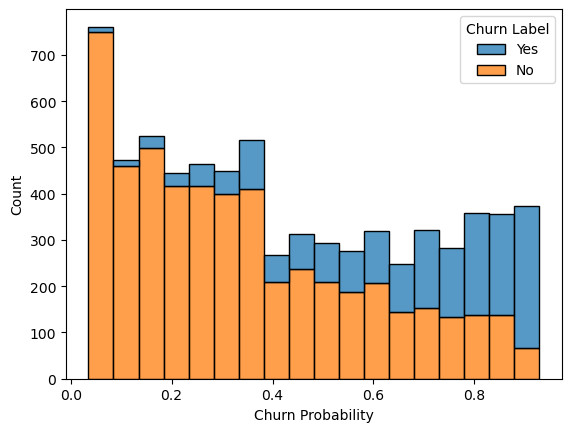

In [11]:
sns.histplot(data=df, x='Churn Probability', hue='Churn Label', multiple='stack')

## Churn Risk

# Analyzing High Risk

## Population Churn Rate

In [12]:
df['Churn Label'].value_counts(normalize=True)*100

No     73.463013
Yes    26.536987
Name: Churn Label, dtype: float64

## Churn Rate without High Risk Customers

In [19]:
mask = df['Customer Risk'] != 'High-Risk'
df_nonrisk = df[mask]

In [23]:
df_nonrisk.shape

(3522, 22)

In [20]:
df_nonrisk['Churn Label'].value_counts(normalize=True)*100

No     92.561045
Yes     7.438955
Name: Churn Label, dtype: float64

## Churn Rate without High Risk and High Value Customers

In [21]:
mask = (df['Customer Risk'] != 'High-Risk') & (df['Customer Value'] != 'High-Value')
df_nonrisk_lowvalue = df[mask]

In [24]:
df_nonrisk_lowvalue.shape

(1488, 22)

In [22]:
df_nonrisk_lowvalue['Churn Label'].value_counts(normalize=True)*100

No     91.397849
Yes     8.602151
Name: Churn Label, dtype: float64